In [3]:
!pip install ruptures
import ruptures as rpt
import pylab as pl
import pandas as pd
%pylab inline




  Created wheel for ruptures: filename=ruptures-1.0.3-cp36-none-any.whl size=55251 sha256=61457bb0bda63c52792014709282888bcd022db8fa69a6d98acf13513e2509e6
  Stored in directory: /root/.cache/pip/wheels/8b/a2/15/6e7b600d1415d6d3e746e3004dc23eef3bf7778d35e6afebac
Successfully built ruptures
Populating the interactive namespace from numpy and matplotlib


# Synthetic data
the cell below creates a synthetic dataset _(x,y)_ of 200 points, generated by two processes $ y =c + \epsilon$ with $\epsilon \sim N(0,1)$ (Gaussian stationary processes) that generate 100 points each with means 20 and 25 respectively.

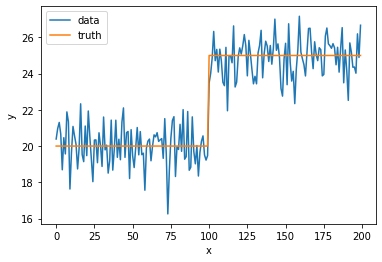

In [211]:
mu1, mu2 = 20, 25
x = np.arange(200)
ym = np.concatenate([np.random.randn(100) + mu1, np.random.randn(100) + mu2])
pl.plot(x, ym, label="data") 
pl.plot(range(200), [mu1] * 100 + [mu2] * 100, label="truth")
pl.xlabel("x")
pl.ylabel("y")
pl.legend();

Figure 1: Truth shows the change in mean after 100 points

# Single POC -  difference of means
write a function that finds the POC by assuming a single POC and maximizing the differencem in the means before and after the POC as described in
https://slides.com/federicabianco/mltsa4#/6/1
test it on the synthetic dataset _(x,y)_

In [0]:
#ym

In [212]:
def maxdiff(y):
    """calculates the POC as the points that maximized the difference between the mean before and the mean after the POC
    y: vector of endogenouos variables
    
    """
    N = len(y)
    f = np.nanmean
    poc, diff, before, after = 0, 0, np.nan, np.nan
    for i in range(1, N): #run through it for every point past the first
        diff_here = np.abs(f(ym[i:]) -  f(ym[:i])) #difference is the mean of all points before (ym is data set) minus all points after, absolute value
        if diff < diff_here: #maximazing difference
            diff = diff_here
            poc = i
            before, after = f(ym[:i]), f(ym[i:]) #the mean from all the points before, after, ignoring nan values
    return(poc, before, after)  

print("poc: {:.2f}, mean before: {:.2f}, mean after: {:.2f}".format(*maxdiff(ym)))

poc: 100.00, mean before: 20.01, mean after: 24.89


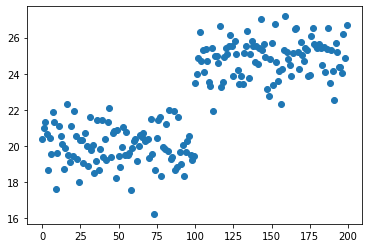

In [213]:
pl.scatter(x,ym)

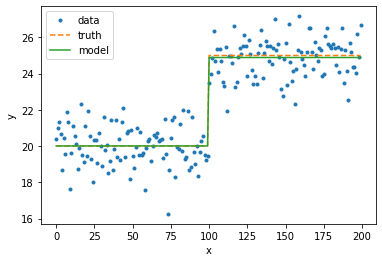

In [214]:
poc, before, after = maxdiff(ym)   
pl.plot(x, ym, '.', label="data")
pl.plot(range(200), [mu1] * 100 + [mu2] * 100, '--', label="truth")
#pl.scatter(x,ym, label = "truth")
pl.plot(x, [before] * poc + [after] * (len(ym) - poc), label="model")
pl.xlabel('x')
pl.ylabel('y');
pl.legend();

Figure 2: model follows truth. This model was based on finding the point that maximized the difference in means on either side of the POC

caption

# Single POC - MSE
write a function that finds the POC by minimizing the square error (see slide https://slides.com/federicabianco/mltsa4#/6/2) a single POC and maximizing the differencem in the means before and after the POC. like before return the index of the POC, the mean before and the mean after the POC.
Plot the data, the model, the truth, like in the step above.


Remember to write a docstring for the function https://www.python.org/dev/peps/pep-0257/!

In [239]:
def poc_mse(y):
    """calculates the POC as the points that maximized the difference between the mean before and the mean after the POC
    y: vector of endogenouos variables
    
    """
    N = len(y)
    f = np.nanmean
    poc, diff, before, after = 0, 0, np.nan, np.nan
    for i in range(1, N): #run through it for every point past the first
        diff_here = (f(ym[i:] - f(ym[i:])))**2 + (f(ym[:i] - f(ym[:i])))**2
        #diff_here = np.abs(f(ym[i:]) -  f(ym[:i])) #difference is the mean of all points before (ym is data set) minus all points after, absolute value
        if diff_here > diff: #maximazing difference
            diff = diff_here
            poc = i
            before, after = f(ym[:i]), f(ym[i:]) #the mean from all the points before, after, ignoring nan values
    #return(poc, before, after)  


    return poc, before, after
print("poc: {:.2f}, mean before: {:.2f}, mean after: {:.2f}".format(*poc_mse(ym)))

poc: 63.00, mean before: 20.04, mean after: 23.55


In [199]:
# poc = 1
# diff = 0
# c = []
# dhere = []
# for i in range(0,200):
#   a = np.abs(ym[i]-f(ym[:i]))**2
#   b = np.abs(ym[i]-f(ym[i+1:]))**2
#   c.append(a+b)
#   dhere.append(np.nanmean(c))
# print(dhere)
  # if dhere < diff:
  #   poc = i
  #   print(i,'HERE')

[nan, 11.32570666365696, 8.17033595382954, 6.7358183367416125, 7.101583448876055, 8.187510570666294, 7.600835135573985, 7.842323030150247, 8.38331160883027, 8.28162739550135, 8.31935085074883, 8.044470431089612, 8.667880832603489, 8.454890281188636, 8.342799621460514, 8.068286727874813, 7.923752407882125, 7.685682829820062, 8.562294697593721, 8.431389903087757, 8.626644589631375, 9.373204339247057, 10.20613018950224, 10.089915064050317, 9.898122601849836, 10.234414747103859, 10.07305642295881, 10.219577428925488, 10.180839639968395, 10.37312154693911, 10.310494331425847, 10.204103864016677, 10.193416256692004, 10.104249977722333, 10.31317417378533, 10.464225506836325, 10.402809375832707, 10.857271431199683, 10.78415838077152, 10.694620714009716, 10.635259918495953, 10.734010614554402, 10.711475957010228, 10.694824150657592, 10.772753275061195, 10.783092460724873, 11.13529147003061, 11.150095358454857, 11.307947157500678, 11.252728417230834, 11.376066481841795, 11.305302235095015, 11.32

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: RuntimeWarning: Mean of empty slice
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: RuntimeWarning: Mean of empty slice
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: RuntimeWarning: Mean of empty slice
  import sys


In [224]:
# start = 100
# poc = 0
# for i in range(0,200):
#   a = np.abs(ym[i] - f(ym[i:]))**2 + np.abs(ym[i] - f(ym[:i]))**2
#   if a < start:
#     start = a
#     poc = i

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: Mean of empty slice
  after removing the cwd from sys.path.


In [0]:
    # N = len(y)
    # f = np.nanmean
    # poc, diff, before, after = 0, 0, np.nan, np.nan
    # for i in range(1, N): #run through it for every point past the first
    #     diff_here = np.abs(f(ym[i:]) -  f(ym[:i])) #difference is the mean of all points before (ym is data set) minus all points after, absolute value
    #     diff_here = y[i] - f(ym[:i])
    #     if diff < diff_here: #maximazing difference
    #         diff = diff_here
    #         poc = i
    #         before, after = f(ym[:i]), f(ym[i:]) #the mean from all the points before, after, ignoring nan values
    # return(poc, before, after)  

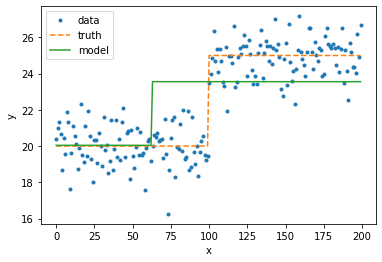

In [240]:
poc, before, after = poc_mse(ym)   
pl.plot(x, ym, '.', label="data")
pl.plot(range(200), [mu1] * 100 + [mu2] * 100, '--', label="truth")
#pl.scatter(x,ym, label = "truth")
pl.plot(x, [before] * poc + [after] * (len(ym) - poc), label="model")
pl.xlabel('x')
pl.ylabel('y');
pl.legend();

Figure 3: similar to figure 2, but with the criteria being mimimizing squared error. Difference in model and truth shows my equation is incorrect. 

caption

# Single POC - diff of variance
Generate a new synthetic dataset _(x,ys)_ of 200 points, generated by two processes $ y =c + \epsilon$ with $\epsilon \sim N(\sigma,1)$ (Gaussian stationary processes) that generate 100 points each with means 20 and variance 1 and 4 respectively.

Modify the ```maxdiff()``` function so that it take an optional parameter sigma which allows you to use the function to choose the POC that maximizes the different in standard deviation, instead of in mean. An optional argument is an argument that is set to a default in the function call. The default behavior of the function shoudl still be to calculate the POC as the point that maximized the before and after difference in the _mean_.


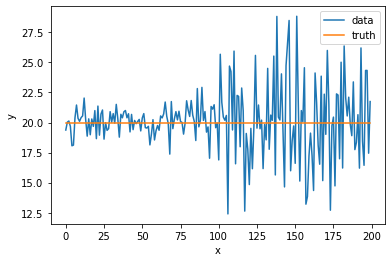

In [175]:
mu1, mu2 = 20, 20
s1, s2 = 1, 4
x = np.arange(200)
ys = np.concatenate([np.random.randn(100) * s1 + mu1, np.random.randn(100) * s2 + mu2])
pl.plot(x, ys, label="data") 
pl.plot(range(200), [mu1] * 100 + [mu2] * 100, label="truth")
pl.xlabel("x")
pl.ylabel("y")
pl.legend();

In [195]:
def maxdiff(y, sigma = False):
    """calculates the POC as the points that maximized the difference between the mean before and the mean after the POC
    y: vector of endogenouos variables
    
    """
    N = len(y)
    f = np.nanmean
    g = np.nanstd
    poc, diff, before, after = 0, 0, np.nan, np.nan

    if sigma == False:
      for i in range(1, N): #run through it for every point past the first
        diff_here = np.abs(f(y[i:]) -  f(y[:i])) #difference is the mean of all points before (ym is data set) minus all points after, absolute value
        if diff < diff_here: #maximazing difference
            diff = diff_here
            poc = i
            before, after = f(y[:i]), f(y[i:]) #the mean from all the points before, after, ignoring nan values
      return(poc, before, after)  

    elif sigma == True:
      for i in range(2, N-1): #run through it for every point past the first
          diff_here = np.abs(g(y[i:]) -  g(y[:i])) #difference is the mean of all points before (ym is data set) minus all points after, absolute value
          #print(diff_here)
          #print(diff_here)
          if diff < diff_here: #maximazing difference
              diff = diff_here
              poc = i
              before, after = g(y[:i]), g(y[i:]) #the mean from all the points before, after, ignoring nan values
      return(poc, before, after)  

print("poc: {:.2f}, standard deviation before: {:.2f}, std after: {:.2f}".format(*maxdiff(ys, 
                                                                    sigma=True)))
  


poc: 100.00, standard deviation before: 1.03, std after: 3.79


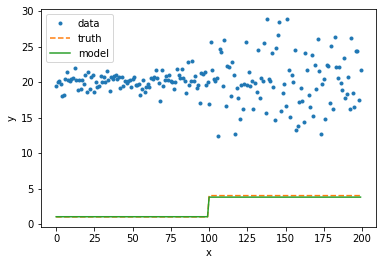

In [196]:
poc, before, after = maxdiff(ys, sigma = True)  
pl.plot(x, ys, '.', label="data")
pl.plot(range(200), [s1] * 100 + [s2] * 100, '--', label="truth")
pl.plot(x, [before] * poc + [after] * (len(ys) - poc), label="model")
pl.xlabel('x')
pl.ylabel('y');
pl.legend();

Same as figure 2, but with criteria being the variance switch instead of mean. 

# Find POC with rupture python package.
install and import the rupture package.
Find the POC in each synthetic time series.
Use the Pelt method. Reflect on the parameters that should be passed to the predict() function. Read the manual and feel free to ask questions on slack.

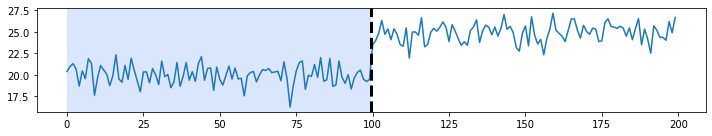

In [242]:
# detection

model = "l1"  # "l2", "rbf"
algo = rpt.Pelt(model=model, min_size=3, jump=5).fit(ym)
result = algo.predict(pen=3)

# algo = rpt.Pelt(model=...).fit(ym)
# result = algo.predict(pen=...)

# display
rpt.display(ym, [100], result)
pl.show()

Using ALGo to find POC, and graphing true POC at 100. Model used was "l1". 

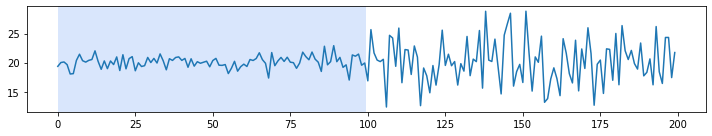

In [243]:
model = "l1"  # "l2", "rbf"
algo = rpt.Pelt(model=model, min_size=3, jump=5).fit(ys)
result = algo.predict(pen=3)

# algo = rpt.Pelt(model=...).fit(ym)
# result = algo.predict(pen=...)

# display
rpt.display(ys, [100], result)
pl.show()

Same as above graph for ys data points. 

# read in the data from LANL earthquake prediction 
I saved in the github repo as "http://fbb.space/mltsa/LALNeq.csv. This is a large file and will take a long time to read in. It is 1/100th of the original file. See how nice I am!?! https://www.kaggle.com/c/LANL-Earthquake-Prediction/data

Visualize and use the method DataFrame.describe() to extract some basic statistics of the dataset

In [245]:
eq1 = pd.read_csv('http://fbb.space/mltsa/LALNeq.csv')
eq1.describe()
#COULD NOT READ DATASET IN TIME DUE TO POOR TIME MANAGEMENT

IncompleteRead: ignored

In [0]:
eq1.head()

# using rupture

Go through the documentation of rupture. 

Find a method that takes as input the number of pocs and has computational complexity O(kN^2) and run it for k=1,2,3 pocs on the first N=10,000, 5000, and 1000 rows of the datasets respectively (make a plot for each and discuss each in the caption)




In [0]:
algo1 = rpt....
result = algo1.predict(n_bkps=1)

model = "l1"  # "l2", "rbf"
algo1 = rpt.Dynp(model=model, min_size=3, jump=5).fit(eq1)
result = algo.predict(n_bkps=1)

# display
#3 is wrong
rpt.display(eq1.acoustic_data.values[:10000], [], result)
plt.show()


caption

In [0]:
model = "l1"  # "l2", "rbf"
algo2 = rpt.Dynp(model=model, min_size=3, jump=5).fit(eq1)
result = algo.predict(n_bkps=2)

# display
rpt.display(eq1.acoustic_data.values[:5000], [], result)
plt.show()

In [0]:
model = "l1"  # "l2", "rbf"
algo3 = rpt.Dynp(model=model, min_size=3, jump=5).fit(eq1)
result = algo.predict(n_bkps=3)

# display
rpt.display(eq1.acoustic_data.values[:1000], [], result)
plt.show()

Find a method that has computational complexity O(Nlog(N))

Run both methods on the full 10000 rows dataset with the goal is to isolate 3 chunks of the time series. Read about the methods you choose, and describe the constraints you imposed and the paraemters you choose.

In [0]:
algo = ...

caption (note that your plot does not need to look exactly like mine